In [1]:
import pytesseract

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

### for configuration

In [4]:
img = cv2.imread('Demo2.png')

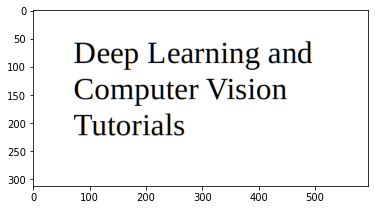

In [5]:
plt.imshow(img) # by default cv2 => BGR (not RGB)

In [6]:
img2char = pytesseract.image_to_string(img)

In [7]:
print(img2char)

Deep Learning and
Computer Vision
Tutorials



In [8]:
imgbox = pytesseract.image_to_boxes(img)

In [9]:
print(imgbox)

D 73 206 104 254 0
e 73 218 110 254 0
e 115 217 136 244 0
p 139 206 187 244 0
L 204 218 234 254 0
e 209 206 259 254 0
a 240 217 261 244 0
r 264 217 286 244 0
n 287 218 304 243 0
i 306 218 332 244 0
n 334 218 375 254 0
g 378 206 403 246 0
a 419 217 441 244 0
n 443 218 469 244 0
d 471 217 496 257 0
C 74 153 106 190 0
o 111 153 135 180 0
m 112 142 168 190 0
p 138 154 179 180 0
u 181 142 206 180 0
t 208 153 235 179 0
e 236 153 251 185 0
r 253 153 294 180 0
V 307 153 336 190 0
i 307 153 346 190 0
s 345 153 379 190 0
i 382 154 396 190 0
o 398 153 422 180 0
n 425 154 451 180 0
T 73 89 99 129 0
u 73 90 105 126 0
t 104 89 131 115 0
o 132 89 147 121 0
r 149 89 173 116 0
i 176 90 193 115 0
a 195 90 209 126 0
l 211 89 233 116 0
s 235 89 269 129 0



In [10]:
imgH, imgW, _ = img.shape

In [11]:
img.shape

(312, 595, 3)

In [12]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    cv2.rectangle(img, (x, imgH-y), (w, imgH-h), (0,0,255), 3)

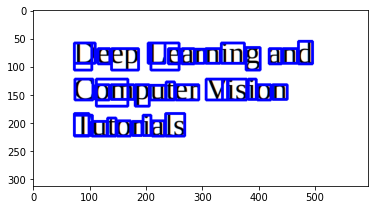

In [13]:
plt.imshow(img)

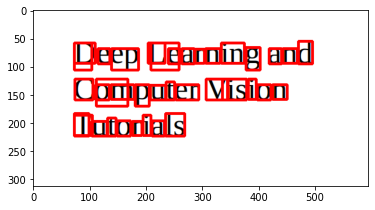

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo

In [15]:
pytesseract.get_tesseract_version()

LooseVersion ('4.1.1')

In [16]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


cap = cv2.VideoCapture("VideoDemo.mp4") # name of the video for text detection

# Check if webcam is open correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
cntr = 0
while True:
    ret, frame = cap.read()
    cntr = cntr+1;
    if((cntr%20)==0):
        
        imgH, imgW, _ = frame.shape
        x1, y1, w1, h1 = 0, 0, imgH, imgW
        
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(img, (x, imgH-y), (w, imgH-h), (0,0,255), 3)
            
            cv2.putText(frame, imgchar, (x1 + int(w1/50), y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            
            font = cv2.FONT_HERSHEY_SIMPLEX
            
            cv2.imshow('Text Detection', frame)
            
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
                
cap.release()
cv2.destroyAllWindow()